In [9]:
from scipy import stats
import matplotlib.pyplot as plt

'''
Function that takes in two dataframe columns and plots a log-log graph
Follows standardised formatting
@input recorded: dataframe column of recorded data
@input predicted: dataframe column of the predicted value
@input xmin: lower bound of graph's x axis
@input xmax: upper bound of graph's x axis
@input ymin: lower bound of graph's y axis
@input ymax: upper bound of graph's y axis
@input xTitle: title for x axis
@input yTitle: title for y axis
@output log log graph of the preducted values against recorded values
'''

def logLogPlotter(recorded, predicted, xmin, xmax, ymin, ymax, xTitle, yTitle, unit):
    x = recorded
    y = predicted

    coefficients = np.polyfit(np.log(x), np.log(y), 1)
    line_function = np.poly1d(coefficients)

    # Create a range for predicted values for the fit line
    x_vals = np.linspace(min(x), max(y), 400)
    y_vals = np.exp(line_function(np.log(x_vals)))

    #calculate similarity measures
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

    #best fit line and y = x line
    plt.scatter(x, y, c='red', marker='x')
    plt.plot(x_vals, y_vals, color='red', label=f'Fit: y = {coefficients[0]:.2f}x + {coefficients[1]:.2f}')
    plt.axline((0, 0), (1,1),color='black',linestyle='--', label=f'y=x, R^2 = {r_value ** 2}',)

    #visuals
    font_family = 'Times New Roman'
    title_font_size=17
    label_font_size=15
    legend_tick_font_size=12

    plt.title(f'Predicted {yTitle} against Recorded {xTitle}', fontsize=title_font_size, fontfamily=font_family)
    plt.xlabel(f'Recorded {xTitle} ({unit})', fontsize=label_font_size, fontfamily=font_family)
    plt.ylabel(f'Predicted {yTitle} ({unit})', fontsize=label_font_size, fontfamily=font_family)

    plt.legend(fontsize = legend_tick_font_size)
    plt.loglog()
    plt.xlim(xmax=xmax, xmin=xmin)
    plt.ylim(ymax=ymax, ymin=ymin)

    plt.show()

In [10]:
'''>>>>> start CodeP4.1F23
V.P. Carey ME249, Fall 2023
Keras Neural Network Modeling '''
#import useful packages
import keras
import pandas as pd
from keras.models import Sequential
import numpy as np
import keras.backend as kb
import tensorflow as tf
#the following 2 lines are only needed for Mac OS machines
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
# define meadian values of input variables - add your values here

import statistics
import numpy
xdata = []
ydata = []
#xdata.append([ Di(m), qoflux (kW/m^2), exit quality, max wall temperature (deg C)])
xdata.append([0.008, 550, 0.525, 306.7])
xdata.append([0.008, 650, 0.525, 298.5])
xdata.append([0.008, 750, 0.525, 294.2])
xdata.append([0.008, 850, 0.525, 290.2])
xdata.append([0.008, 950, 0.524, 286.9])
xdata.append([0.008, 1050, 0.524, 284.1])
xdata.append([0.008, 1150, 0.525, 281.7])
xdata.append([0.008, 850, 0.524, 290.31])
xdata.append([0.008, 550, 0.734, 307.9])
xdata.append([0.008, 750, 0.735, 295.5])
xdata.append([0.008, 950, 0.735, 287.8])
xdata.append([0.008, 1050, 0.735, 285.0])
xdata.append([0.008, 1150, 0.735, 282.5])
xdata.append([0.008, 850, 0.734, 291.3])
xdata.append([0.008, 550, 0.945, 308.6])
xdata.append([0.008, 750, 0.945, 296.2])
xdata.append([0.008, 950, 0.945, 288.5])
xdata.append([0.008, 1150, 0.945, 283.1])
xdata.append([0.008, 850, 0.945, 291.9])
xdata.append([0.011, 550, 0.525, 328.0])
xdata.append([0.011, 750, 0.525, 311.2])
xdata.append([0.011, 950, 0.525, 300.8])
xdata.append([0.011, 1150, 0.525, 293.6])
xdata.append([0.011, 850, 0.525, 305.5])
xdata.append([0.011, 550, 0.735, 329.6])
xdata.append([0.011, 750, 0.735, 312.6])
xdata.append([0.011, 950, 0.735, 302.0])
xdata.append([0.011, 1050, 0.735, 299.4])
xdata.append([0.011, 1150, 0.735, 294.8])
xdata.append([0.011, 850, 0.735, 306.8])
xdata.append([0.011, 550, 0.945, 330.7])
xdata.append([0.011, 750, 0.945, 313.6])
xdata.append([0.011, 950, 0.944, 302.9])
xdata.append([0.011, 1150, 0.945, 295.6])
xdata.append([0.011, 850, 0.944, 307.7])
xdata.append([0.011, 700, 0.734, 324.7])
xdata.append([0.013, 550, 0.525, 342.2])
xdata.append([0.013, 750, 0.524, 322.3])
xdata.append([0.013, 950, 0.524, 310.0])
xdata.append([0.013, 1150, 0.525, 301.6])
xdata.append([0.013, 850, 0.524, 315.5])
xdata.append([0.013, 550, 0.734, 344.1])
xdata.append([0.013, 750, 0.735, 324.0])
xdata.append([0.013, 950, 0.735, 311.5])
xdata.append([0.013, 1050, 0.735, 306.3])
xdata.append([0.013, 1150, 0.735, 302.9])
xdata.append([0.013, 850, 0.734, 317.1])
xdata.append([0.013, 550, 0.945, 345.3])
xdata.append([0.013, 750, 0.944, 325.1])
xdata.append([0.013, 950, 0.944, 312.5])
xdata.append([0.013, 1150, 0.945, 303.9])
xdata.append([0.013, 850, 0.945, 318.2])

#data.append([mdot (kg/s)])
ydata.append([0.06157])
ydata.append([0.07269])
ydata.append([0.08396])
ydata.append([0.09347])
ydata.append([0.10635])
ydata.append([0.11521])
ydata.append([0.1287])
ydata.append([0.09516])
ydata.append([0.04398])
ydata.append([0.05997])
ydata.append([0.07596])
ydata.append([0.08343])
ydata.append([0.0919])
ydata.append([0.06797])
ydata.append([0.0342])
ydata.append([0.04664])
ydata.append([0.05908])
ydata.append([0.0715])
ydata.append([0.05286])
ydata.append([0.0846])
ydata.append([0.1154])
ydata.append([0.1462])
ydata.append([0.177])
ydata.append([0.1308])
ydata.append([0.06047])
ydata.append([0.08246])
ydata.append([0.1044])
ydata.append([0.1134])
ydata.append([0.1264])
ydata.append([0.0934])
ydata.append([0.047])
ydata.append([0.06413])
ydata.append([0.08124])
ydata.append([0.09834])
ydata.append([0.072691])
ydata.append([0.087196])
ydata.append([0.10005])
ydata.append([0.13644])
ydata.append([0.17282])
ydata.append([0.2092])
ydata.append([0.15463])
ydata.append([0.07147])
ydata.append([0.09745])
ydata.append([0.12344])
ydata.append([0.13302])
ydata.append([0.1494])
ydata.append([0.11045])
ydata.append([0.05558])
ydata.append([0.0758])
ydata.append([0.09601])
ydata.append([0.1162])
ydata.append([0.0859])
xarray= numpy.array(xdata)
yarray= numpy.array(ydata)
# print (xdata)
# print (xarray)
# print (ydata)
# print (yarray)
x_original = np.array(xdata)
y_original = np.array(ydata)

#convert to:
# median values of output variables
ND=len(xarray)
Diall = [row[0] for row in xdata]
Dimed=statistics.median(Diall)
q0all = [row[1] for row in xdata]
q0med=statistics.median(q0all)
xeall = [row[2] for row in xdata]
xemed=statistics.median(xeall)
Twall = [row[3] for row in xdata]
Twmed=statistics.median(Twall)

mall = [row[0] for row in ydata]
mmed=statistics.median(mall)

xdata = []
ydata = []
for i in range(ND):
    xdata.append([xarray[i,0]/Dimed,xarray[i,1]/q0med,xarray[i,2]/xemed,xarray[i,3]/Twmed])
    ydata.append([yarray[i,0]/mmed])

xarray= np.array(xdata)
yarray= np.array(ydata)

#print (yarray)

data_inputs = np.array(xdata)
data_outputs = np.array(ydata)

In [12]:
xdata_df = pd.DataFrame(x_original, columns=['Di', 'qoflux', 'xe', 'mdot'])
ydata_df = pd.DataFrame(y_original, columns=['mdot'])


In [13]:
xdata_normalized = xdata_df.divide(xdata_df.median())
ydata_normalized = ydata_df.divide(ydata_df.median())


In [14]:
from sklearn.model_selection import train_test_split
training_input,validation_input,training_output,validation_output = train_test_split(xarray,
yarray, test_size=0.25, random_state=13)
# print to check the shape of training and validation set
training_input= np.array(training_input)#[:,[1,2,3]])
training_output= np.array(training_output)
validation_input= np.array(validation_input)#[:,[1,2,3]])
validation_output= np.array(validation_output)

print(validation_input)

xarray=training_input
yarray=training_output


[[1.18181818 0.88235294 1.         1.06334099]
 [0.72727273 1.11764706 0.71292517 0.94158188]
 [1.         0.88235294 0.71428571 1.02133246]
 [1.18181818 1.35294118 1.28571429 0.99737447]
 [0.72727273 0.64705882 0.71428571 1.00656383]
 [0.72727273 0.64705882 1.28571429 1.01279947]
 [1.18181818 1.         0.71292517 1.0354447 ]
 [1.         1.         1.         1.00689202]
 [1.18181818 1.35294118 1.         0.99409255]
 [0.72727273 1.35294118 0.71428571 0.92451592]
 [1.         1.35294118 1.         0.96750903]
 [1.         1.         0.71428571 1.00262553]
 [1.18181818 0.64705882 1.28571429 1.13324582]]


In [15]:
x_train = pd.DataFrame(training_input, columns=['Di', 'qoflux', 'xe', 'mdot'])
x_validate = pd.DataFrame(validation_input,columns=['Di', 'qoflux', 'xe', 'mdot'])

y_train = pd.DataFrame(training_output, columns=['mdot'])
y_validate = pd.DataFrame(validation_output, columns=['mdot'])

In [6]:
# define neural network model
#As seen below, we have created four dense layers.
#A dense layer is a layer in neural network that’s fully connected.
#In other words, all the neurons in one layer are connected to all other neurons in the next layer.
#In the first layer, we need to provide the input shape, which is 1 in our case.
#The activation function we have chosen is elu, which stands for exponential linear unit. .
from keras import backend as K
#initialize weights with values between -0.2 and 0.5
initializer = keras.initializers.RandomUniform(minval= -0.2, maxval=0.5)
model = keras.Sequential([
keras.layers.Dense(6, activation=K.elu, input_shape=[4], kernel_initializer=initializer),
keras.layers.Dense(8, activation=K.elu, kernel_initializer=initializer),
keras.layers.Dense(12, activation=K.elu, kernel_initializer=initializer),
keras.layers.Dense(16, activation=K.elu, kernel_initializer=initializer),
keras.layers.Dense(8, activation=K.elu, kernel_initializer=initializer),
keras.layers.Dense(1, kernel_initializer=initializer)
])

In [7]:
#We’re using RMSprop as our optimizer here. RMSprop stands for Root Mean Square Propagation.
#It’s one of the most popular gradient descent optimization algorithms for deep learning networks.
#RMSprop is an optimizer that’s reliable and fast.
#We’re compiling the mode using the model.compile function. The loss function used here
#is mean squared error. After the compilation of the model, we’ll use the fit method with ~500 epochs.
#Number of epochs can be varied.
#from tf.keras import optimizers
rms = keras.optimizers.RMSprop(0.01)
model.compile(loss='mean_absolute_error',optimizer=rms)

In [8]:
#After the compilation of the model, we’ll use the fit method with 500 epochs.
#I started with epochs value of 100 and then tested the model after training.
#The prediction was not that good. Then I modified the number of epochs to 200 and tested the model again.
#Accuracy had improved slightly, but figured I’d give it one more try. Finally, at 500 epochs
#I found acceptable prediction accuracy.
#The fit method takes three parameters; namely, x, y, and number of epochs.
#During model training, if all the batches of data are seen by the model once,
#we say that one epoch has been completed.
# Add an early stopping callback
es = keras.callbacks.EarlyStopping(
monitor='loss',
mode='min',
patience = 90,
restore_best_weights = True,
verbose=1)
# Add a checkpoint where loss is minimum, and save that model
mc = keras.callbacks.ModelCheckpoint('best_model.SB', monitor='loss',
mode='min', verbose=1, save_best_only=True)
historyData = model.fit(xarray,yarray,epochs=800,callbacks=[es])
loss_hist = historyData.history['loss']
#The above line will return a dictionary, access it's info like this:
best_epoch = np.argmin(historyData.history['loss']) + 1
print ('best epoch = ', best_epoch)
print('smallest loss =', np.min(loss_hist))
model.save('./best_model')

Epoch 1/800
39/39 [==============================] - 1s 18ms/step - loss: 1.0853
Epoch 2/800
39/39 [==============================] - 0s 303us/step - loss: 0.3059
Epoch 3/800
39/39 [==============================] - 0s 661us/step - loss: 0.3085
Epoch 4/800
39/39 [==============================] - 0s 530us/step - loss: 0.4283
Epoch 5/800
39/39 [==============================] - 0s 302us/step - loss: 0.3788
Epoch 6/800
39/39 [==============================] - 0s 911us/step - loss: 0.3445
Epoch 7/800
39/39 [==============================] - 0s 1ms/step - loss: 0.3175
Epoch 8/800
39/39 [==============================] - 0s 393us/step - loss: 0.5141
Epoch 9/800
39/39 [==============================] - 0s 479us/step - loss: 0.2928
Epoch 10/800
39/39 [==============================] - 0s 1ms/step - loss: 0.3331
Epoch 11/800
39/39 [==============================] - 0s 461us/step - loss: 0.4212
Epoch 12/800
39/39 [==============================] - 0s 343us/step - loss: 0.4205
Epoch 13/800
39/39

## (e) Training Set

In [26]:
y_predictions_df = pd.DataFrame(model.predict(x_train), columns=['mdot'])
y_predictions_df[:5]

,mdot
0,0.838984
1,0.521625
2,0.643208
3,2.472154
4,1.541645


In [27]:
y_recorded_df = y_train
y_recorded_df[:5]

,mdot
0,0.771722
1,0.503400
2,0.692175
3,2.257960
4,1.243497


### MAE

In [28]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_recorded_df['mdot'], y_predictions_df['mdot'])
print(f'MAE: {mae}')

MAE: 0.11038735682398816


### Log-log Plot

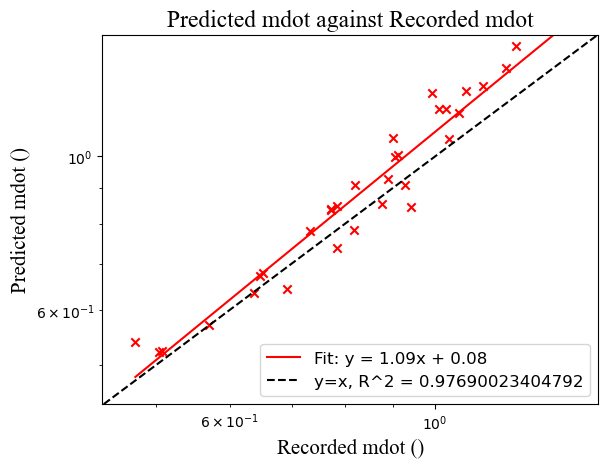

In [29]:
logLogPlotter(y_recorded_df['mdot'], y_predictions_df['mdot'], -0.5, 1.5, -0.5, 1.5, 'mdot', 'mdot', '')

## (f) Validation Set

In [31]:
y_predictions_df = pd.DataFrame(model.predict(x_validate), columns=['mdot'])
y_predictions_df[:5]

,mdot
0,1.152565
1,1.352978
2,1.373867
3,1.412574
4,0.722325


In [32]:
y_recorded_df = y_validate
y_recorded_df[:5]

,mdot
0,1.051808
1,1.147868
2,1.245548
3,1.254182
4,0.664544


In [33]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_recorded_df['mdot'], y_predictions_df['mdot'])
print(f'MAE: {mae}')

MAE: 0.16150012319651827


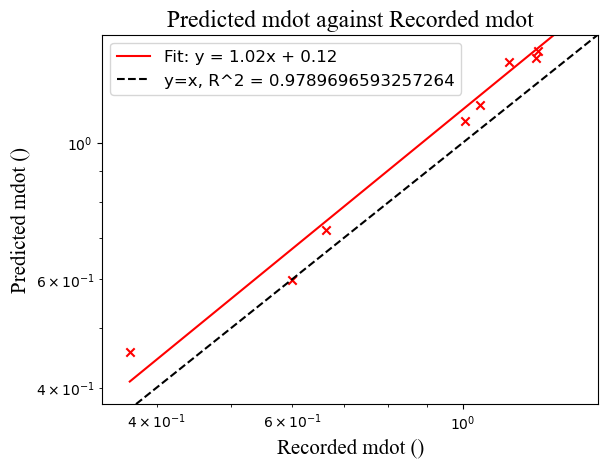

In [34]:
logLogPlotter(y_recorded_df['mdot'], y_predictions_df['mdot'], -0.5, 1.5, -0.5, 1.5, 'mdot', 'mdot', '')